#Introduction
In this lab and the next we will work through the "Cats vs. Dogs" example from Chapter 5 of Chollet.  In this lab our data are color photos of cats and dogs.  Our goal is to classify a photo according to which kind of animal it has.

## Set Runtime Type
Today's models are our first fairly computationally intensive models.

To reduce some of the computational burden and make it so you can finish the lab in a reasonable time, I'm going to give you model fits with parameter estimates that you can use.

However, I want you to set up models in Keras and run estimation for at least a few epochs so that you can see how the models are specified and estimated.  This will give you something to refer to during homework assignments and your project.

## Imports

In [0]:
from keras import layers
from keras import models
from keras import optimizers
from keras.preprocessing import image
import os
import time
from google.colab import drive
import matplotlib.pyplot as plt
import pickle

## Getting the data
I have shared a google drive folder with you with a .zip file containing the data (the photos).  To get the data into colab, do these steps:

1. Sign into drive.google.com
2. Click on "Shared with me" on the left side of the screen
3. Right click on the stat344ne_cats_and_dogs_small folder and select "Add to My Drive"
4. Run the code cell below and click on the link that is displayed.  It will pop up a new browser tab where you have to authorize Colab to access your google drive.  Then, copy the sequence of numbers and letters that is displayed and paste it in the space that shows up in the code cell below.


In [3]:
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


5. Now, run the code below.  This makes a directory in your working space in colab to store the files, unzips the image data into that directory, and sets up where the training and validation data are stored.

In [0]:
os.mkdir("/content/stat344ne_cats_and_dogs_small/")
!unzip -uq "/content/drive/My Drive/stat344ne_cats_and_dogs_small/cats_and_dogs_small.zip" -d "/content/stat344ne_cats_and_dogs_small/"
train_dir = '/content/stat344ne_cats_and_dogs_small/cats_and_dogs_small/train'
validation_dir = '/content/stat344ne_cats_and_dogs_small/cats_and_dogs_small/validation'

## First Model
Let's build a first, basic CNN.  Use the following structure:

 * Input images are color images that are 150 pixels by 150 pixels.
 * Convolutional layer with 32 filters that are 3 by 3, relu activation
 * Max pooling layer with 2 by 2 pooling
 * Convolutional layer with 64 filters that are 3 by 3, relu activation
 * Max pooling layer with 2 by 2 pooling
 * Convolutional layer with 128 filters that are 3 by 3, relu activation
 * Max pooling layer with 2 by 2 pooling
 * Convolutional layer with 128 filters that are 3 by 3, relu activation
 * Max pooling layer with 2 by 2 pooling
 * Flatten (this really isn't a "layer", but the operation is defined in the Keras layers submodule)
 * Dense layer with 512 units and relu activation
 * Dense layer with 1 unit and sigmoid activation


In [0]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

Compile your model.  What loss function should we use?  Add accuracy as a metric to monitor.

In [0]:
model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

The following code sets up generators to assemble mini-batches of training and validation data, with batch size 20.

In [22]:
train_datagen = image.ImageDataGenerator(rescale=1./255)
val_datagen = image.ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

validation_generator = val_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


"Fit" your model.  This took about 4 minutes when I ran it for 30 epochs.  To save us all from tedium, set your estimation to run for 5 epochs.  This should be long enough to see that training is working, and the accuracy is going up; in principle, you know how to code this up and what it is doing (right?).  Below, we'll load in the estimated model from when I ran this to inspect.

In [23]:
tic = time.time()
history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=30,
      validation_data=validation_generator,
      validation_steps=50)
toc = time.time()
toc - tic

Epoch 1/30
100/100 [==============================] - 9s 86ms/step - loss: 0.6843 - acc: 0.5435 - val_loss: 0.6760 - val_acc: 0.5610
Epoch 2/30
100/100 [==============================] - 8s 79ms/step - loss: 0.6303 - acc: 0.6510 - val_loss: 0.6570 - val_acc: 0.6180
Epoch 3/30
100/100 [==============================] - 8s 79ms/step - loss: 0.5828 - acc: 0.6920 - val_loss: 0.6556 - val_acc: 0.6260
Epoch 4/30
100/100 [==============================] - 8s 79ms/step - loss: 0.5599 - acc: 0.7020 - val_loss: 0.6259 - val_acc: 0.6500
Epoch 5/30
100/100 [==============================] - 8s 78ms/step - loss: 0.5305 - acc: 0.7340 - val_loss: 0.5736 - val_acc: 0.6930
Epoch 6/30
100/100 [==============================] - 8s 77ms/step - loss: 0.5130 - acc: 0.7455 - val_loss: 0.5750 - val_acc: 0.7000
Epoch 7/30
100/100 [==============================] - 8s 76ms/step - loss: 0.4853 - acc: 0.7675 - val_loss: 0.5584 - val_acc: 0.7130
Epoch 8/30
100/100 [==============================] - 8s 78ms/step - 

235.21881079673767

In [0]:
model.save('/content/drive/My Drive/stat344ne_cats_and_dogs_small/cats_and_dogs_small_1.h5')
with open('/content/drive/My Drive/stat344ne_cats_and_dogs_small/cats_and_dogs_small_1_history.pickle', 'wb') as handle:
    pickle.dump(history, handle)

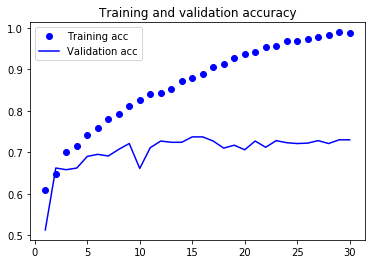

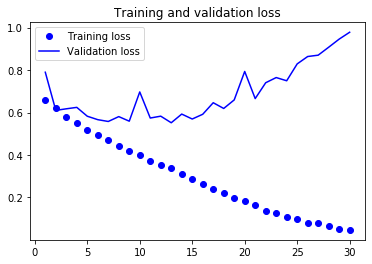

In [45]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

In [0]:
datagen = image.ImageDataGenerator(
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

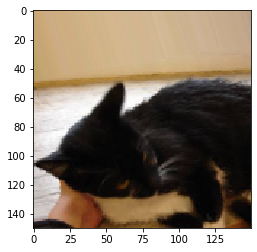

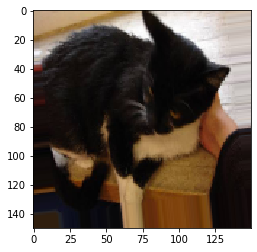

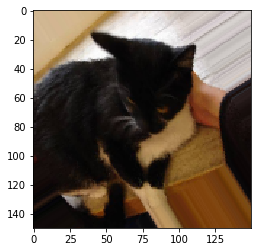

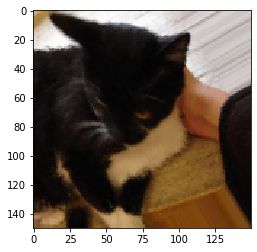

In [7]:
train_cats_dir = train_dir + "/cats"
fnames = [os.path.join(train_cats_dir, fname) for
     fname in os.listdir(train_cats_dir)]

img_path = fnames[5]

img = image.load_img(img_path, target_size=(150, 150))

x = image.img_to_array(img)
x = x.reshape((1,) + x.shape)

i = 0
for batch in datagen.flow(x, batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i += 1
    if i == 4:
        break

plt.show()

In [8]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])






Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [11]:
train_datagen = image.ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,)

test_datagen = image.ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(150, 150),
        batch_size=32,
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=32,
        class_mode='binary')

tic = time.time()
history2 = model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=100,
      validation_data=validation_generator,
      validation_steps=50)
toc = time.time()
toc - tic

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.



Epoch 1/100





100/100 [==============================] - 39s 395ms/step - loss: 0.6861 - acc: 0.5378 - val_loss: 0.6674 - val_acc: 0.5838
Epoch 2/100
100/100 [==============================] - 25s 255ms/step - loss: 0.6662 - acc: 0.5841 - val_loss: 0.6562 - val_acc: 0.5966
Epoch 3/100
100/100 [==============================] - 25s 252ms/step - loss: 0.6517 - acc: 0.6072 - val_loss: 0.6553 - val_acc: 0.5996
Epoch 4/100
100/100 [==============================] - 26s 256ms/step - loss: 0.6309 - acc: 0.6375 - val_loss: 0.6131 - val_acc: 0.6566
Epoch 5/100
100/100 [==============================] - 24s 239ms/step - loss: 0.6165 - acc: 0.6531 - val_loss: 0.6818 - val_acc: 0.6060
Epoch 6/100
100/100 [==============================] - 27s 274ms/step - loss: 0.6004 - acc: 0.6756 - val_loss: 0.5836 - val_acc: 0.6765
Epoch 7/100
100/100 [==============================] - 25s 248ms/step - loss: 0.5986 - acc: 

2527.316395521164

In [0]:
model.save('/content/drive/My Drive/stat344ne_cats_and_dogs_small/cats_and_dogs_small_2.h5')
with open('/content/drive/My Drive/stat344ne_cats_and_dogs_small/cats_and_dogs_small_2_history.pickle', 'wb') as handle:
    pickle.dump(history2, handle)

In [0]:
with open('/content/drive/My Drive/stat344ne_cats_and_dogs_small/cats_and_dogs_small_2_history.pickle', 'rb') as handle:
    history3 = pickle.load(handle)

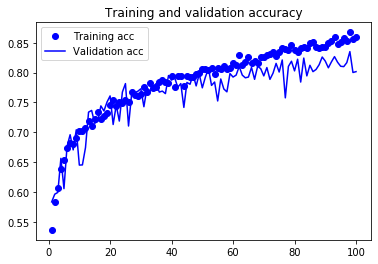

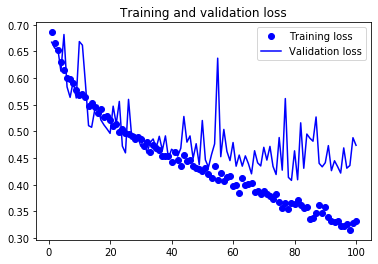

In [18]:
acc = history3.history['acc']
val_acc = history3.history['val_acc']
loss = history3.history['loss']
val_loss = history3.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()